# Report for knn based classifier with detailed findings



K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data).

Algorithm
Let m be the number of training data samples. Let p be an unknown point.

  1) Store the training samples in an array of data points arr[]. This means each element of this array represents      a  tuple (x, y).

  2) for i=0 to m:
      Calculate (Euclidean/Manhattan/Cosine) distance d(arr[i], p).

  3) Make set S of K smallest distances obtained. Each of these distances corresponds to an already classified       data point.
  
  4)Return the majority label among S.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report as cr
from scipy.spatial import distance as dist
ddd=[]

# Method 1

In [3]:
#Import dataset
dataset=pd.read_csv('train.csv',header=None)
test_data=pd.read_csv('test.csv',header=None) 
label_data=pd.read_csv('test_labels.csv',header=None)
# label_data

In [4]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Location x is independent(label) and y is independent(vales)
x=dataset.iloc[:,:1]
y=dataset.iloc[:,1:]
z=test_data


In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
0    20000 non-null int64
dtypes: int64(1)
memory usage: 156.3 KB


In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 784 entries, 1 to 784
dtypes: int64(784)
memory usage: 119.6 MB


In [8]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 784 entries, 0 to 783
dtypes: int64(784)
memory usage: 6.0 MB


#  KNN using euclidean distance

In [9]:
#Putting the first row into label and second into pixels
pixel=pd.DataFrame(y).to_numpy()
label=pd.DataFrame(x).to_numpy()
test_pixel=pd.DataFrame(z).to_numpy()
test_label=pd.DataFrame(label_data).to_numpy()

label_list=[]
for i in range(0,999):
    lb=test_label[i]
    label_list.append(lb)
# label_list

In [10]:
# Distance between first and all other rows

list2=[]
for i in range(0,999):
    list1=[]
    neighbors = []
    m=test_pixel[i]
    for j in range(1,20000):
        l=pixel[j]
        q=label[j]
        distance = np.linalg.norm(l-m)
        list1.append((q,distance))
        
    list1.sort(key=lambda ele:ele[1])
    k=5
    for p in range(k):
        neighbors.append(list1[p][0])

    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count) 
    list2.append(prediction)
print('The accuracy using euclidean distance with k=5 :')    
print (accuracy_score(label_list, list2))   
ddd.append(accuracy_score(label_list,list2))
    
# list2    
# for i in range(len(list2)):
#     print(list2[i])

The accuracy using euclidean distance with k=5 :
0.9629629629629629


# Confusion Matrix:


A confusion matrix is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

The Confusion Matrix for euclidean distance with k=5:


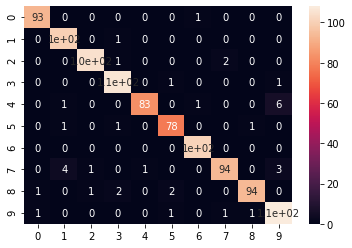

In [11]:
print('The Confusion Matrix for euclidean distance with k=5:')
import seaborn as sns
import matplotlib.pyplot as plt     
cm=confusion_matrix(label_list,list2)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); 


# Precision

To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive (small number of FP).

# Recall

Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. 

High Recall indicates the class is correctly recognized (small number of FN).
High recall, low precision:This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

Low recall, high precision:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

# F-measure:

Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more.
The F-Measure will always be nearer to the smaller value of Precision or Recall.

# Report shown with K:5 for euclidean distance

In [12]:

print(cr(label_list , list2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.94      0.99      0.97       101
           2       0.98      0.97      0.98       108
           3       0.95      0.98      0.97       108
           4       0.99      0.91      0.95        91
           5       0.95      0.96      0.96        81
           6       0.98      1.00      0.99       101
           7       0.97      0.91      0.94       103
           8       0.98      0.94      0.96       100
           9       0.92      0.96      0.94       112

    accuracy                           0.96       999
   macro avg       0.96      0.96      0.96       999
weighted avg       0.96      0.96      0.96       999



In [13]:
k_range = range(1,50)
scores = []
for k in k_range:
    scores.append(accuracy_score(label_list,list2))
print(scores) 

[0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629]


Text(0, 0.5, 'Testing Accuracy')

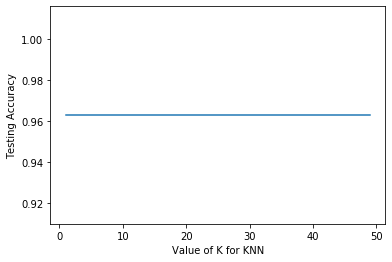

In [14]:
# allow plots to appear within the 

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


# KNN using manhattan distance and k=3


In [15]:

list2=[]
for i in range(0,999):
    list1=[]
    neighbors = []
    m=test_pixel[i]
    for j in range(1,20000):
        l=pixel[j]
        q=label[j]
        distance= dist.cityblock(l,m)
        list1.append((q,distance))
        
    list1.sort(key=lambda ele:ele[1])
    k=3
    for p in range(k):
        neighbors.append(list1[p][0])

    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count) 
    list2.append(prediction)
print('The accuracy using manhattan distance with k=3:')    
print (accuracy_score(label_list, list2)*100)   


The accuracy using manhattan distance with k=3:
95.7957957957958


The Confusion Matrix for manhattan distance with k=3:


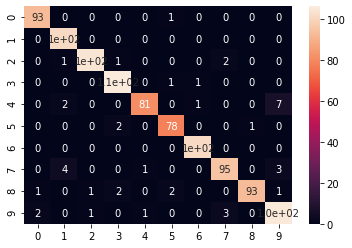

In [16]:

print('The Confusion Matrix for manhattan distance with k=3:')
import seaborn as sns
import matplotlib.pyplot as plt     
cm1=confusion_matrix(label_list,list2)
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax); 

# Report shown with K:3 for manhattan distance

In [17]:

print(cr(label_list , list2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        94
           1       0.94      1.00      0.97       101
           2       0.98      0.96      0.97       108
           3       0.95      0.98      0.97       108
           4       0.98      0.89      0.93        91
           5       0.95      0.96      0.96        81
           6       0.98      1.00      0.99       101
           7       0.95      0.92      0.94       103
           8       0.99      0.93      0.96       100
           9       0.91      0.94      0.92       112

    accuracy                           0.96       999
   macro avg       0.96      0.96      0.96       999
weighted avg       0.96      0.96      0.96       999



# Method 2(using sklearn)

In [18]:
dataset=pd.read_csv('train.csv',header=None)
test_data=pd.read_csv('test.csv',header=None)
label_data=pd.read_csv('test_labels.csv',header=None)

In [19]:
#x represents first coloumn and y represents all remaining coloumns
x=dataset.iloc[:,:1]
y=dataset.iloc[:,1:]

In [20]:
train_data=pd.DataFrame(y)
test_data_df=pd.DataFrame(test_data)
label=pd.DataFrame(label_data)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(y,x)
y_pred = knn.predict(test_data_df)
print("Accuracy:",metrics.accuracy_score(label, y_pred))
ddd.append(accuracy_score(label,y_pred))

/home/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 0.961


The Confusion Matrix with sklearn and k=5:


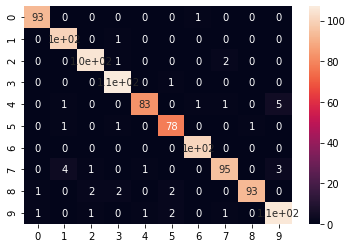

In [23]:
print('The Confusion Matrix with sklearn and k=5:')
import seaborn as sns
import matplotlib.pyplot as plt     
cm1=confusion_matrix(label,y_pred)
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax); 

In [24]:

print(cr(label ,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.94      0.99      0.97       101
           2       0.96      0.97      0.97       108
           3       0.96      0.99      0.97       108
           4       0.98      0.91      0.94        91
           5       0.94      0.96      0.95        81
           6       0.98      1.00      0.99       101
           7       0.96      0.91      0.94       104
           8       0.99      0.93      0.96       100
           9       0.93      0.95      0.94       112

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [28]:
ddd

[0.9629629629629629, 0.961, 0.961]

# Plot with sklearn VS without sklearn

Text(0, 0.5, 'Testing Accuracy')

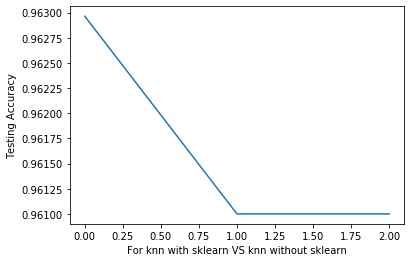

In [27]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(ddd)
plt.xlabel('For knn with sklearn VS knn without sklearn')
plt.ylabel('Testing Accuracy')